<a href="https://colab.research.google.com/github/CharmThiekshanaPerera/Coffee-Shop-Backend/blob/main/Predicted_Exam_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib  # for saving the model

In [6]:
# Load dataset
path = '/content/drive/MyDrive/Habitmic/student_habits_performance.csv'
df = pd.read_csv(path)

# Display basic info
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing categorical values with mode
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


<ipython-input-7-d35fd6890acf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)


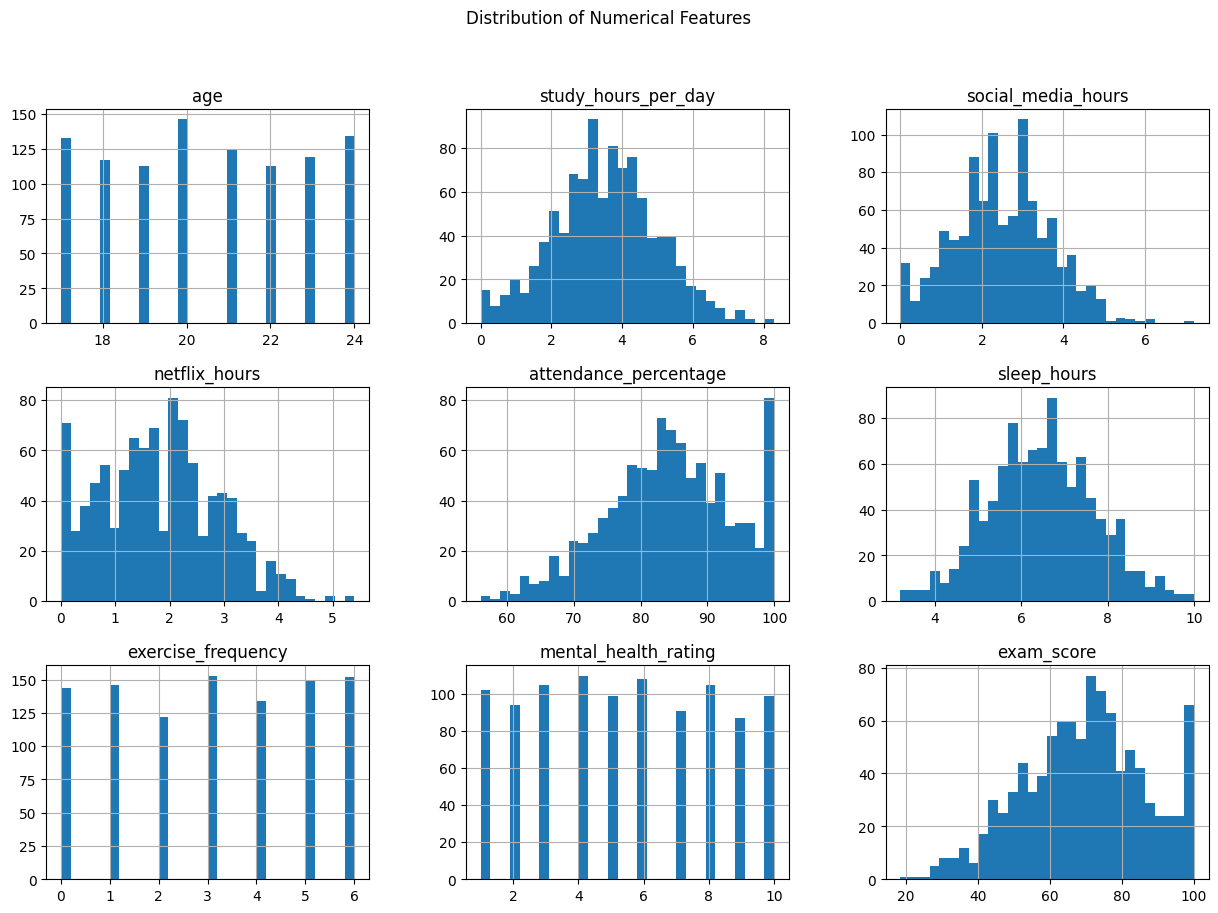

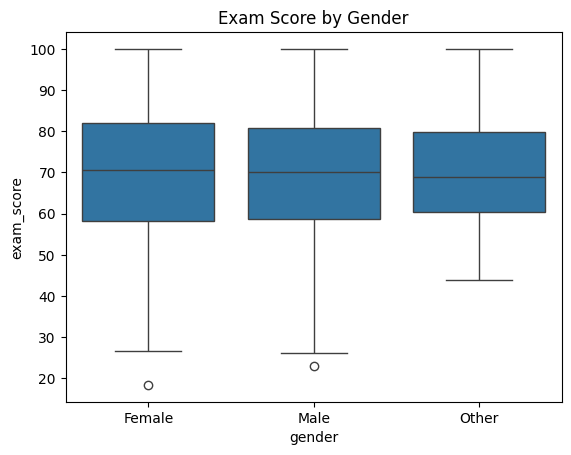

In [8]:
# Histograms of numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot of exam score by gender
sns.boxplot(data=df, x='gender', y='exam_score')
plt.title("Exam Score by Gender")
plt.show()

In [9]:
categorical_cols = [
    'gender', 'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation', 'part_time_job'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Drop unused columns
X = df.drop(columns=['student_id', 'exam_score'])
y = df['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a simple regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 4.172475975530878
R² Score: 0.8966663721200843


In [14]:
# Save trained model
joblib.dump(model, '/content/drive/MyDrive/Habitmic/exam_score_model.pkl')

# Save label encoders
joblib.dump(label_encoders, '/content/drive/MyDrive/Habitmic/label_encoders.pkl')

['/content/drive/MyDrive/Habitmic/label_encoders.pkl']

In [15]:
# Load model & encoders
model = joblib.load('/content/drive/MyDrive/Habitmic/exam_score_model.pkl')
label_encoders = joblib.load('/content/drive/MyDrive/Habitmic/label_encoders.pkl')

# Sample new input
new_data = {
    'age': 22,
    'gender': label_encoders['gender'].transform(['Female'])[0],
    'study_hours_per_day': 4.0,
    'social_media_hours': 2.0,
    'netflix_hours': 1.5,
    'part_time_job': label_encoders['part_time_job'].transform(['No'])[0],
    'attendance_percentage': 91.5,
    'sleep_hours': 7.5,
    'diet_quality': label_encoders['diet_quality'].transform(['Fair'])[0],
    'exercise_frequency': 4,
    'parental_education_level': label_encoders['parental_education_level'].transform(['Master'])[0],
    'internet_quality': label_encoders['internet_quality'].transform(['Average'])[0],
    'mental_health_rating': 6,
    'extracurricular_participation': label_encoders['extracurricular_participation'].transform(['Yes'])[0],
}

input_df = pd.DataFrame([new_data])
predicted_score = model.predict(input_df)[0]
print("📘 Predicted Exam Score:", predicted_score)


📘 Predicted Exam Score: 81.18428006407845


In [16]:
# Load model and encoders
model = joblib.load('/content/drive/MyDrive/Habitmic/exam_score_model.pkl')
label_encoders = joblib.load('/content/drive/MyDrive/Habitmic/label_encoders.pkl')

# Function to take user input and return predicted exam score
def get_user_input_and_predict():
    print("🔸 Please provide the following inputs:")

    age = int(input("Age: "))
    gender = input("Gender (Male/Female/Other): ")
    study_hours_per_day = float(input("Study hours per day: "))
    social_media_hours = float(input("Social media hours per day: "))
    netflix_hours = float(input("Netflix hours per day: "))
    part_time_job = input("Do you have a part-time job? (Yes/No): ")
    attendance_percentage = float(input("Attendance percentage (0-100): "))
    sleep_hours = float(input("Sleep hours per day: "))
    diet_quality = input("Diet quality (Poor/Fair/Good): ")
    exercise_frequency = int(input("Exercise frequency per week (0-7): "))
    parental_education_level = input("Parental education level (High School/Bachelor/Master/PhD): ")
    internet_quality = input("Internet quality (Poor/Average/Good): ")
    mental_health_rating = int(input("Mental health rating (1-10): "))
    extracurricular_participation = input("Do you participate in extracurriculars? (Yes/No): ")

    # Transform categorical values
    input_data = {
        'age': age,
        'gender': label_encoders['gender'].transform([gender])[0],
        'study_hours_per_day': study_hours_per_day,
        'social_media_hours': social_media_hours,
        'netflix_hours': netflix_hours,
        'part_time_job': label_encoders['part_time_job'].transform([part_time_job])[0],
        'attendance_percentage': attendance_percentage,
        'sleep_hours': sleep_hours,
        'diet_quality': label_encoders['diet_quality'].transform([diet_quality])[0],
        'exercise_frequency': exercise_frequency,
        'parental_education_level': label_encoders['parental_education_level'].transform([parental_education_level])[0],
        'internet_quality': label_encoders['internet_quality'].transform([internet_quality])[0],
        'mental_health_rating': mental_health_rating,
        'extracurricular_participation': label_encoders['extracurricular_participation'].transform([extracurricular_participation])[0],
    }

    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]

    print(f"\n🎓 Predicted Exam Score: **{prediction:.2f}**")

# Run it
get_user_input_and_predict()

🔸 Please provide the following inputs:
Age: 22
Gender (Male/Female/Other): Male
Study hours per day: 4
Social media hours per day: 2
Netflix hours per day: 1
Do you have a part-time job? (Yes/No): No
Attendance percentage (0-100): 50
Sleep hours per day: 6
Diet quality (Poor/Fair/Good): Fair
Exercise frequency per week (0-7): 0
Parental education level (High School/Bachelor/Master/PhD): Bachelor
Internet quality (Poor/Average/Good): Good
Mental health rating (1-10): 5
Do you participate in extracurriculars? (Yes/No): No

🎓 Predicted Exam Score: **67.12**
